In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Load the DataSet

In [3]:
housing_dataset = pd.read_csv("../DataSet/housing.csv")
housing_dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### Data Exploration and Preprocessing

In [5]:
# check for missing values
housing_dataset.isnull().sum()





price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# check for duplicate values
housing_dataset.duplicated().sum()




np.int64(0)

In [8]:
# dataset["furnishingstatus"].value_counts()
housing_dataset["bathrooms"].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [9]:
housing_dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [13]:
# Convert categorical variables to numerical
# use label encodeing task
dataset = pd.get_dummies(housing_dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                                           'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)
dataset



,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,True,False,True,False,False,False,False,True
541,1767150,2400,3,1,1,0,False,False,False,False,False,False,True,False
542,1750000,3620,2,1,1,0,True,False,False,False,False,False,False,True
543,1750000,2910,3,1,1,0,False,False,False,False,False,False,False,False


### Seperate the features and target variable

In [15]:
# X = housing_dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 
#              'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 
#              'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]
# OR use 
x = housing_dataset.drop('price',axis=1)
y = housing_dataset['price']

## Data Splitting

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Training

In [18]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [20]:
y_pred = model.predict(X_test)


In [21]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1754318687330.66
Mean absolute Error: 970043.40
R-squared: 0.65


### Visualization

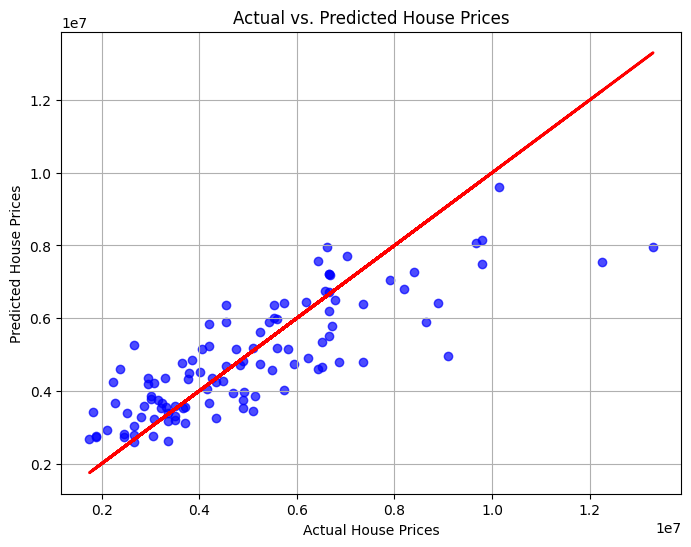

In [23]:
# Step 8: Visualization
# Visualize the actual vs. predicted house prices using a scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)
plt.show()

### Model Interpretation

In [24]:
# Print the coefficients (slopes) for each feature to understand their impact on the house price
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients (Slopes):")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.2f}")

print(f"Intercept: {intercept:.2f}")

Coefficients (Slopes):
area: 235.97
bedrooms: 76778.70
bathrooms: 1094444.79
stories: 407476.59
parking: 224841.91
mainroad_yes: 367919.95
guestroom_yes: 231610.04
basement_yes: 390251.18
hotwaterheating_yes: 684649.89
airconditioning_yes: 791426.74
prefarea_yes: 629890.57
furnishingstatus_semi-furnished: -126881.82
furnishingstatus_unfurnished: -413645.06
Intercept: 260032.36


### Prediction Script



In [25]:
input_data = pd.DataFrame({
    'area': [1500],
    'bedrooms': [3],
    'bathrooms': [2],
    'stories': [1],
    'parking': [2],
    'mainroad_yes': [1],
    'guestroom_yes': [0],
    'basement_yes': [1],
    'hotwaterheating_yes': [1],
    'airconditioning_yes': [0],
    'prefarea_yes': [1],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})

# Predict the price
predicted_price = model.predict(input_data)[0]
predicted_price

np.float64(5836201.419989707)

#### Create a function to predict the price

In [26]:
# Function to predict house price
def predict_price(area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus):
    print("mainroad",mainroad)
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'area': [area],
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'stories': [stories],
        'parking': [parking],
        'mainroad_yes': [1 if mainroad else 0],
        'guestroom_yes': [1 if guestroom else 0],
        'basement_yes': [1 if basement else 0],
        'hotwaterheating_yes': [1 if hotwaterheating else 0],
        'airconditioning_yes': [1 if airconditioning else 0],
        'prefarea_yes': [1 if prefarea else 0],
        'furnishingstatus_semi-furnished': [1 if furnishingstatus == 'semi-furnished' else 0],
        'furnishingstatus_unfurnished': [1 if furnishingstatus == 'unfurnished' else 0]
    })
    # Predict the price
    predicted_price = model.predict(input_data)[0]
    return predicted_price

In [27]:
# Example usage of the prediction function
area = 1500
bedrooms = 3
bathrooms = 2
stories = 2
parking = 2
mainroad = True
guestroom = False
basement = True
hotwaterheating = True
airconditioning = False
prefarea = True
furnishingstatus = 'semi-furnished'

predicted_price = predict_price(area, bedrooms, bathrooms, stories, parking, mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea, furnishingstatus)
print(f"Predicted Price: {predicted_price:.2f}")

mainroad True
Predicted Price: 6243678.01


### Save the model

In [29]:
import joblib
# step6:- model
joblib.dump(model, '../Models/linear_regression_model.pkl')

['../Models/linear_regression_model.pkl']